### Project Objectives
This project will attempt to answer the following questions from the data provided.
1. Which species appear in which park the most?
2. Is there a significant difference between species and their conservation status?
3. Are certain types of species more likely to be endangered? 

### Import libraries, Loading Data, Getting Familiar 

In [140]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [141]:
#load the data
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')


In [142]:
print(species.columns)
print(observations.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


### Dealing with Missing Data

In [143]:
# check how many null values exist: 
# what are different data types in the data set?

print(observations.info(memory_usage= False))
print('\n')
print(species.info(memory_usage= False))

# 5824-191 = 5633: There are 5633 missing(null) rows in the conversation status.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)None


In [144]:
# Let's look at if missing data is systematic or if it's random before we try to deal with it.
print(species[species.conservation_status.notnull()])
print(species[species.conservation_status.isnull()])
species.conservation_status.value_counts(dropna=False)



            category                   scientific_name  \
7             Mammal                     Canis latrans   
8             Mammal                       Canis lupus   
9             Mammal                       Canis rufus   
29            Mammal                  Eptesicus fuscus   
30            Mammal         Lasionycteris noctivagans   
...              ...                               ...   
5302  Vascular Plant             Callitriche marginata   
5399  Vascular Plant  Camissonia sierrae ssp. alticola   
5426  Vascular Plant                Epilobium oreganum   
5436  Vascular Plant              Botrychium ascendens   
5676  Vascular Plant                  Romneya coulteri   

                                           common_names conservation_status  
7                                                Coyote  Species of Concern  
8                                             Gray Wolf          Endangered  
9                                              Red Wolf          Enda

NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [145]:
# It appears that the missing rows are structurally missing data.
# The reason why the data is missing in the conservation status column is presumably,
# because the species in question is not under any conservation
species.conservation_status.fillna('N/A',inplace=True)
print(species.conservation_status.value_counts(dropna=False))

N/A                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


In [146]:
# It appears that scientific name is common between two csv files/datasets. Let's count how many unique scientific names are in species dataframe
# and see if it matches total count of rows. If it does, it probably indicates that the species_info file is a database of all distinct species names. 

print(species.scientific_name.value_counts(dropna=False))
print(species.scientific_name.count()) # This is the total count of scientific_names 
species[species.scientific_name=='Castor canadensis'] # This is an example of a duplicate
# explore duplicated values 
species['dup_scientific_name']= species.scientific_name.duplicated(False)
species[species.dup_scientific_name == True]
#This showed that scientific name is duplicated when multiple common names exist for the same species


Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: scientific_name, Length: 5541, dtype: int64
5824


,category,scientific_name,common_names,conservation_status,dup_scientific_name
4,Mammal,Cervus elaphus,Wapiti Or Elk,N/A,True
5,Mammal,Odocoileus virginianus,White-Tailed Deer,N/A,True
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",N/A,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",N/A,True
...,...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",N/A,True
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",N/A,True
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",N/A,True
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",N/A,True


In [147]:
#Now let's look at the duplicates in the common_names column...

species['dup_common_name'] =species.common_names.duplicated(False)
print(species.common_names.value_counts(dropna=False)) 
# There are duplicates in the common_names as well. 
# Let's see the data to understand if they're typos.


Brachythecium Moss                                                            7
Dicranum Moss                                                                 7
Panic Grass                                                                   6
Bryum Moss                                                                    6
Sphagnum                                                                      6
                                                                             ..
Pine                                                                          1
Red Spruce                                                                    1
Norway Spruce                                                                 1
Fraser Fir                                                                    1
Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur    1
Name: common_names, Length: 5504, dtype: int64


In [148]:
duplicates_common_name = species[(species.dup_common_name == True) ]
duplicates_scientific_name = species[(species.dup_scientific_name == True) ]

### Cleaning/Wranglig Data Types

In [149]:
# category, and conservation_status columns are categorical data so let's dig into them and see if there are any categorical names that has a typo
# and if we can quickly clean that up. First let's count unique/distinct values
print(species.conservation_status.nunique()) # There are 4 distinct statuses
print(species.conservation_status.unique())

print('\n');print(species.category.nunique())# There are 7 distinct categories
print(species.category.unique())

#need to associate a ranking to differnet levels of conservation status
# per https://www.iucnredlist.org/ and ranking is as follows: 
# Not Evaluated, Data Deficient, Least Concern, Near Threatened, Vulnerable, Endangered, Critically Endangered, Extinct in the Wild and Extinct.
# Dataset shall have the following order: Species of Concern <Threatened < Endangered < In Recovery
#CategoricalDtype() # Another way to convert type to categorical, but prefer using pandas method Categorical in this project to prevent unnecessary library import
species['conservation_status'] = pd.Categorical(values= species.conservation_status, categories=['N/A','Species of Concern', 'Threatened', 'Endangered','In Recovery'], ordered = True)
species['category'] =pd.Categorical(values= species.category,categories=['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish' ,'Vascular Plant','Nonvascular Plant'])

print('\n'); print(species.dtypes)

# observation seems to be a numerical value, so let's convert that to an integer, since it's a count.
observations.observations.astype('int')
print('\n'); print(observations.dtypes)
observations.observations.value_counts() 


5
['N/A' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


category               category
scientific_name          object
common_names             object
conservation_status    category
dup_scientific_name        bool
dup_common_name            bool
dtype: object


scientific_name    object
park_name          object
observations        int64
dtype: object


84     220
85     210
91     206
92     203
95     202
      ... 
9        1
321      1
303      1
314      1
310      1
Name: observations, Length: 304, dtype: int64

### Merging Dataframes

In [150]:
print(observations.scientific_name.nunique())
# There are 5541 unique species in the observations dataset
print(species.scientific_name.nunique())
# There are 5541 unique species in the species dataset

# This means that it will likely be a 1:1 match once we merge two datasets together. 
# Left merge is used on the scientific_name column as that's the only shared column between the tables.
df=pd.merge(observations,species,how='left',on='scientific_name')


5541
5541


In [151]:
#let's clean the df dataframe
df.drop(columns=['dup_common_name','dup_scientific_name','common_names'],inplace=True)
df.drop_duplicates(inplace=True)


In [152]:
#this block is for testing, to be removed
#df.head()
#df=df[df.scientific_name == 'Agrostis capillaris']
#df=df[df.park_name == 'Great Smoky Mountains National Park']

### Descriptive Statistics
Let's gather some quick stats
1. How many different species in each park?
2. How many species on average in each park?
3. What is the top 10 most observed species across all national parks?
4. Which national park has the most endangered species?
5. Which category, on average, has the most endangered species?
5. For each conservation status, what is the ratio of each species category? (pie chart) 


In [153]:
# 1. How many different species in each park? There are more than 5820 species in each park.
df_size= df.groupby('park_name').size()
#df_size= df_size[df_size.observations != 0]
df_size
#sns.countplot(x='',y='',data=df_grouped,)

park_name
Bryce National Park                    5828
Great Smoky Mountains National Park    5823
Yellowstone National Park              5824
Yosemite National Park                 5826
dtype: int64

In [154]:
# 2. How many species on average in each park? Yellowstone has the highest number of species on average around 250 different kinds.
df_group_1 = df.groupby('park_name').observations.aggregate(['min', 'max','mean','sum'])
df_group_1


,min,max,mean,sum
park_name,,,,
Bryce National Park,9,176,98.866678,576195
Great Smoky Mountains National Park,10,147,74.109050,431537
Yellowstone National Park,57,321,247.770604,1443016
Yosemite National Park,31,223,148.164950,863209


In [155]:
# 3. What is the top 10 most observed species across all national parks?

df_group_2= df.groupby(['scientific_name']).observations.aggregate(['sum'])
df_group_2.sort_values('sum',ascending=False,inplace=True)
df_group_2.iloc[:10]

,sum
scientific_name,
Holcus lanatus,1780
Castor canadensis,1725
Hypochaeris radicata,1720
Puma concolor,1711
Procyon lotor,1692
Columba livia,1653
Oncorhynchus mykiss,1626
Myotis lucifugus,1547
Streptopelia decaocto,1530


In [156]:
# 4a. Total endangered species count per national park and category
#df_group_3= df.groupby(['conservation_status','park_name']).observations.aggregate(['sum'])
df_group_3_sum=df.pivot_table(index=['park_name'],columns='category',values='observations',aggfunc=['sum'])
df_group_3_sum

sum                                   \
category                            Mammal    Bird Reptile Amphibian   Fish   
park_name                                                                     
Bryce National Park                  20680   51647    7950      7380  12587   
Great Smoky Mountains National Park  15071   37728    5691      5707   9306   
Yellowstone National Park            50869  126996   19554     19440  30946   
Yosemite National Park               30535   76207   11483     11444  18792   

                                                                      
category                            Vascular Plant Nonvascular Plant  
park_name                                                             
Bryce National Park                         442959             32992  
Great Smoky Mountains National Park         333177             24857  
Yellowstone National Park                  1112190             83021  
Yosemite National Park                      664965             49783

In [174]:
# 4b. Average endangered species count per national park and category
df_group_3_mean= df.pivot_table(index=['park_name'],columns='category',values='observations',aggfunc=['mean']).round().astype(int)
df_group_3_mean


mean                              \
category                            Mammal Bird Reptile Amphibian Fish   
park_name                                                                
Bryce National Park                     95   99     101        92   98   
Great Smoky Mountains National Park     69   72      72        71   72   
Yellowstone National Park              236  244     248       243  240   
Yosemite National Park                 141  146     145       143  146   

                                                                      
category                            Vascular Plant Nonvascular Plant  
park_name                                                             
Bryce National Park                             99                99  
Great Smoky Mountains National Park             75                75  
Yellowstone National Park                      249               249  
Yosemite National Park                         149               149

In [254]:
# 5. Which category has the most endangered species on average?
#df_group_4= df.groupby(['conservation_status','category']).observations.aggregate(['sum'])

# null values in the conservation status column likely represent species not categorized for conservation, i.e not under conservation.

df_group_4=df.pivot_table(index='category',columns='conservation_status',values='observations',aggfunc=['mean'],fill_value=(0)).round().astype(int)
df_group_4.loc['Total']=df_group_4.sum()
df_group_4['mean','Grand Total']=df_group_4.sum(axis=1) #adds a total line to the right of pivot table
df_group_4_percent_column = df_group_4.apply(func= lambda x: x/x.sum(),axis=1)
df_group_4


mean                                                       \
conservation_status  N/A Species of Concern Threatened Endangered In Recovery   
category                                                                        
Mammal               142                129         72         46          60   
Bird                 144                127          0         36         116   
Reptile              142                127          0          0           0   
Amphibian            141                128         70         36           0   
Fish                 144                132         82         38           0   
Vascular Plant       143                129         69         40           0   
Nonvascular Plant    143                135          0          0           0   
Total                999                907        293        196         176   

                                 
conservation_status Grand Total  
category                         
Mammal                      449  
Bird                        423  
Reptile                     269  
Amphibian                   375  
Fish                        396  
Vascular Plant              381  
Nonvascular Plant           278  
Total                      2571

### Summary
Distribution of data appears to be normal.


XXXX of assessed species , yyy are threatened with extinction , aaa are critically endangered.

### Plots
1. Average species count
2. average species count per category and national park
3. Endangered species count per national park
4. Endangered species count per category

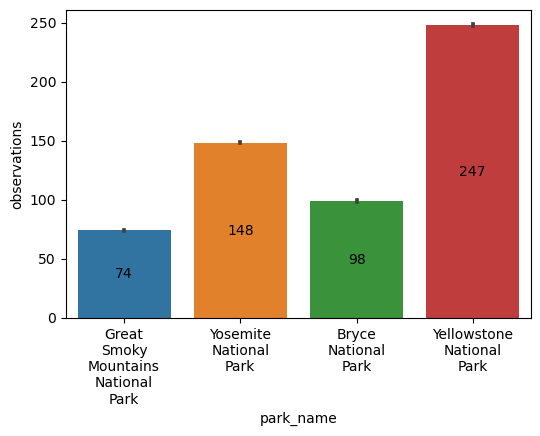

In [159]:
#Total species count per national park
fig, ax = plt.subplots(figsize=(6, 4))
#observations.groupby('park_name').mean()
sns.barplot(x='park_name', y='observations',data=observations) #creates plot
#inserts new line in between each work in x tick labels.
#from here
xlabels_new=[]
for label in ax.xaxis.get_ticklabels():
    xlabels_new.append(label.get_text().replace(' ','\n'))
ax.set_xticklabels(xlabels_new) 
# up to here
ax.bar_label(ax.containers[-1], fmt='%d', label_type='center') #annotates in the center of bars 
#ax.tick_params(axis='x', labelrotation =10) # not needed because there is a break in between each word in x tick labels

plt.title('')
plt.show()

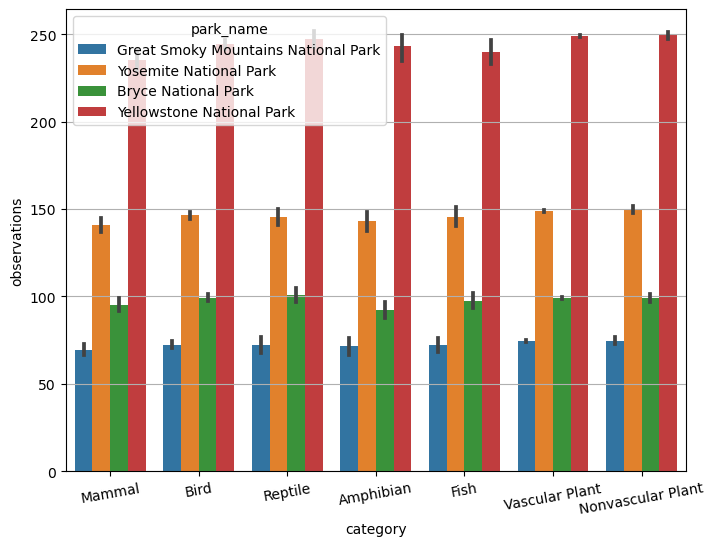

In [160]:
#Number of species per category and national park
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='category', y='observations',hue='park_name',data=df)
ax.tick_params(axis='x', labelrotation =10)
ax.grid(axis='y')
#to do convert this chart to stacked bar plot
plt.show()


In [161]:
#Number of endangered species for each national park